# Keras CNN 
Adapted from https://github.com/fchollet/keras/blob/master/examples/cifar10_cnn.py

In [5]:
import sys
import os
import numpy as np
import pandas as pd
import cPickle as pickle
import sklearn
from sklearn.model_selection import train_test_split
# from PIL import Image
# import png
import matplotlib.pyplot as plt
from datetime import datetime
import tensorflow as tf
%matplotlib inline
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from skimage.color import convert_colorspace,rgb2ycbcr,rgb2gray

In [2]:
import random

In [3]:
# Parameter setting
home = '/Users/chih-hsulin/'
home = '/Users/chlin'
batch_size = 500
num_classes = 10
epochs = 4
data_augmentation = True

In [7]:
# Load subset of training data
pFN = '../data/trainSubset.pkl'
pFile = open(pFN, 'rb')
trainX,trainY = pickle.load(pFile)
trainY = trainY - 1
trainY = keras.utils.to_categorical(trainY, num_classes)

EOFError: 

In [113]:
pFN = home+'/data/COMP540Project2017/train.pkl'
pFile = open(pFN, 'rb')
trainX,trainY = pickle.load(pFile)
trainY = trainY - 1
trainY = keras.utils.to_categorical(trainY, num_classes)

In [6]:
# Load extra training data
class LineAccess4D(object):
    def __init__(self, path, col_n,row_n,depth, dtype):
        self.dtype = dtype
        self.fd = open(path, 'rb')
        self.line_length = (col_n*row_n*depth)*dtype.itemsize

    def read_line(self, line):
        offset = line*self.line_length
        self.fd.seek(offset)
        data = self.fd.read(self.line_length)
        return np.frombuffer(data, self.dtype)

    def close(self):
        self.fd.close()

class LineAccess1D(object):
    def __init__(self, path, dtype):
        self.dtype = dtype
        self.fd = open(path, 'rb')
        self.line_length = dtype.itemsize

    def read_line(self, line):
        offset = line*self.line_length
        self.fd.seek(offset)
        data = self.fd.read(self.line_length)
        return np.frombuffer(data, self.dtype)

    def close(self):
        self.fd.close()
        
def loadArrayBytes4D(path, sample_start,sample_end,col_n,row_n,depth, dtype):
    rla = LineAccess4D(path, col_n,row_n,depth, dtype)
    data = []
    for i in xrange(sample_start,sample_end):
        data.append(rla.read_line(i).reshape(col_n,row_n,depth).astype(np.float32))
    return(np.array(data))

def loadArrayBytes1D(path, sample_start,sample_end, dtype):
    rla = LineAccess1D(path, dtype)
    data = []
    for i in xrange(sample_start,sample_end):
        data+=list(rla.read_line(i).astype(np.float32))
    return(np.array(data))


# line_indices = list(range(cols))
# for i in range(10):
# #     print(i, rla.read_line(i))
#     print(rla.read_line(i))
#     print(type(rla.read_line(i)))
#     print(rla.read_line(i).reshape(col_n,row_n,depth))

In [8]:
dtype=np.dtype(np.uint8)
type(dtype)
# sample_end = 531131
sample_end = 604388
sample_start = 0
# sample_end = 10
col_n = 32
row_n = 32
depth = 3

In [ ]:
path = home+'/data/COMP540Project2017/trainX_all.bytes'
trainX_all = loadArrayBytes4D(path, sample_start,sample_end,col_n,row_n,depth, dtype)
print(trainX_all.shape)

In [83]:
path = home+'/data/COMP540Project2017/trainY_all.bytes'
trainY_all = loadArrayBytes1D(path,sample_start,sample_end,dtype)
print(trainY_all.shape)

(604388,)


In [6]:
print(trainX_extra.shape)


(10, 32, 32, 3)
(10,)


In [4]:
print(trainY[2])
print(trainX[2])
plt.imshow(trainX[2])

[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
[[[ 19  54 110]
  [ 20  52 111]
  [ 25  57 116]
  ..., 
  [ 65 144 223]
  [ 78 148 218]
  [ 98 158 220]]

 [[ 21  53 110]
  [ 19  52 106]
  [ 25  56 111]
  ..., 
  [ 63 137 208]
  [ 91 153 214]
  [130 180 229]]

 [[ 21  53 110]
  [ 20  51 106]
  [ 22  52 106]
  ..., 
  [ 79 147 210]
  [125 181 230]
  [178 218 254]]

 ..., 
 [[ 88 162 237]
  [ 89 163 238]
  [ 84 156 230]
  ..., 
  [ 62 142 227]
  [ 67 144 226]
  [ 74 145 225]]

 [[ 88 164 240]
  [ 87 160 237]
  [ 88 159 237]
  ..., 
  [ 60 141 230]
  [ 61 141 228]
  [ 65 143 226]]

 [[ 84 160 238]
  [ 81 154 233]
  [ 87 158 238]
  ..., 
  [ 63 144 235]
  [ 62 143 232]
  [ 63 145 231]]]


ValueError: 3-dimensional arrays must be of dtype unsigned byte, unsigned short, float32 or float64

(32, 32)


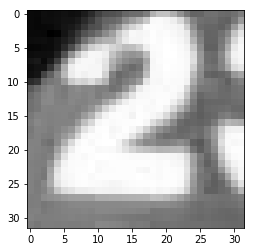

In [5]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

# img=convert_colorspace(trainX[3],'RGB','HSV')
img = rgb2gray(trainX[2])
plt.imshow(img,cmap='gray')
print(img.shape)

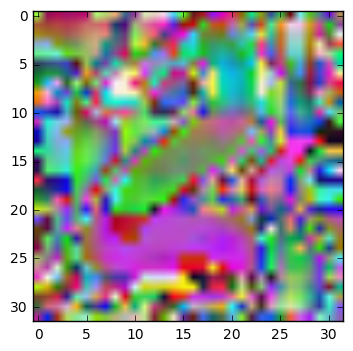

In [61]:
def StandardScaler3d(img):
    final = []
    for x in img:
        final.append(sklearn.preprocessing.StandardScaler().fit_transform(x))
    return(np.array(final))

img = StandardScaler3d(img)
plt.imshow(img)

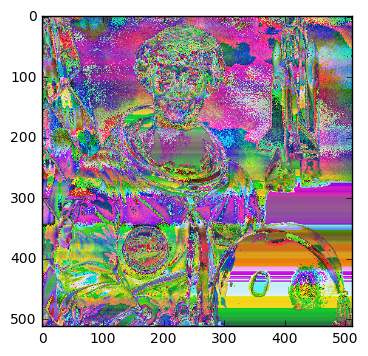

In [70]:
from skimage import data
img = data.astronaut()
plt.imshow(img)
plt.imshow(StandardScaler3d(rgb2ycbcr(img)))

In [69]:
# Load test data
pFN = home+'/data/COMP540Project2017/test.pkl'
pFile = open(pFN, 'rb')
testX = pickle.load(pFile)
testX.shape

(26032, 32, 32, 3)

In [ ]:
# crop data to 28 x 28
trainX = trainX[:,2:-2,2:-2]
print(trainX.shape)

In [70]:
testX = testX[:,2:-2,2:-2]
print(testX.shape)

(26032, 28, 28, 3)


In [116]:
print('x_train shape:', trainX.shape)
print(len(trainX), 'train samples')
print(len(testX), 'test samples')
test_train_ratio = float(len(testX))/(len(trainX)+len(testX))
test_train_ratio

x_train shape: (73257, 28, 28, 3)
73257 train samples
26032 test samples


0.2621841291583156

In [117]:
x_train, x_val, y_train, y_val = train_test_split(trainX, trainY, test_size=test_train_ratio, random_state=0)
print(x_train.shape)
print(x_val.shape)

(54050, 28, 28, 3)
(19207, 28, 28, 3)


In [84]:
trainX_all_idx = np.array(range(trainY_all.shape[0]))
print('trainY_all shape:', trainX_all_idx.shape)
print(len(trainX_all_idx), 'train samples')
print(len(testX), 'test samples')
test_train_ratio = float(len(testX))/(len(trainX_all_idx)+len(testX))
test_train_ratio

trainY_all shape: (604388,)
604388 train samples
26032 test samples


0.04129310618317947

In [85]:
x_train_idx, x_val_idx, y_train, y_val = train_test_split(trainX_all_idx, trainY_all, test_size=test_train_ratio, random_state=0)
print(x_train_idx.shape)
print(x_val_idx.shape)

(579430,)
(24958,)


In [86]:
print(x_train_idx[:10])
print(type(x_train_idx))

[441754 416360 564320 219805 411732 181897 537945 271330 581218 581349]
<type 'numpy.ndarray'>


# Build model

In [71]:
# CNN from Keras example
modelName = 'CNN_v2'
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [104]:
# CNN from Keras example + Batch Normalization
modelName = 'CNN_v3'
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [77]:
# CNN from Keras example + Batch Normalization + 2 Conv Layers (128x128)
modelName = 'CNN_v4'
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_val.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
# CNN from Keras example + Batch Normalization + 2 Conv Layers (128x128)
modelName = 'CNN_v7'
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_val.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [20]:
# CNN from Keras example + Batch Normalization + 2 Conv Layers (128x128) + 2 Conv Layers (256x256)
modelName = 'CNN_v5'
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [28]:
# CNN from Keras example + Batch Normalization + 2 Conv Layers (128x128)
# Conv(32,3,3)+BN+Conv(32,3,3)+MP+DO+BN+Conv(64,3,3)+BN+Conv(64,3,3)+MP+DO+BN+Conv(128,3,3)+BN+Conv(128,3,3)+MP+DO+BN+
# Conv(256,3,3)+BN+Conv(256,3,3)+MP+DO+BN+FC(4096)+DO+BN+FC(4096)+DO+BN+FC(10)
modelName = 'CNN_v6'
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [32]:
# CNN from Keras example + Batch Normalization + 2 Conv Layers (128x128) + LeakyReLU
modelName = 'CNN_v4_2'
model = Sequential()
leakyR = keras.layers.advanced_activations.LeakyReLU(alpha=0.3)

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(leakyR)
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(leakyR)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(leakyR)
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(leakyR)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(leakyR)
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(leakyR)
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512))
model.add(leakyR)
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [14]:
# CNNv1
modelName = 'CNN_v1'
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [78]:
# Let's train the model using RMSprop
Adamax = keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
Adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(loss='categorical_crossentropy',
#               optimizer='rmsprop',
              optimizer=Adam,
              metrics=['accuracy'])

In [120]:
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_train /= 255
x_val /= 255

In [71]:
testX = testX.astype('float32')
x_test = testX/255

In [72]:
x_test.shape

(26032, 28, 28, 3)

In [73]:
# gray scale
x_test = rgb2gray(x_test)
x_test = [minMaxNormSample(d) for d in x_test]
x_test = np.array([x_test])
x_test=x_test.transpose(1,2,3,0)
x_test.shape

(26032, 28, 28, 1)

In [138]:
path = home+'/data/COMP540Project2017/trainX_all.bytes'
x_val =np.array([loadArrayBytes4D(path,i,i+1,col_n,row_n,depth,dtype) for i in x_val_idx])
print(x_val.shape)
x_val=x_val.reshape(len(x_val_idx),col_n,row_n,depth)
x_val /= 255
print(x_val.shape,x_val.dtype)
y_val = y_val - 1
y_val = keras.utils.to_categorical(y_val, num_classes)
print(y_val.shape)

(60439, 1, 32, 32, 3)
(60439, 32, 32, 3) float32
(60439, 10)


In [139]:
x_val = x_val[:,2:-2,2:-2]
print(x_val.shape)

(60439, 28, 28, 3)


In [87]:
col_n=28
row_n=28
path = home+'/data/COMP540Project2017/trainX_all_crop.bytes'
x_val =np.array([loadArrayBytes4D(path,i,i+1,col_n,row_n,depth,dtype) for i in x_val_idx])
print(x_val.shape)
x_val=x_val.reshape(len(x_val_idx),col_n,row_n,depth)
x_val /= 255
x_val = rgb2gray(x_val)
x_val = np.array([minMaxNormSample(d) for d in x_val])
print(x_val.shape,x_val.dtype)
y_val = y_val - 1
y_val = keras.utils.to_categorical(y_val, num_classes)
print(y_val.shape)

(24958, 1, 28, 28, 3)
(24958, 28, 28) float32
(24958, 10)


[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


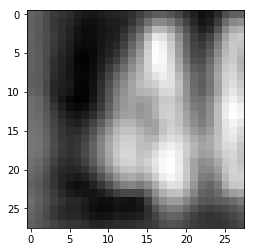

In [88]:
print(y_val[0])
plt.imshow(x_val[0],cmap="gray")

In [89]:
x_val = np.array([x_val])
x_val=x_val.transpose(1,2,3,0)
x_val.shape

(24958, 28, 28, 1)

In [150]:
def loadDataFromFile(path,index,y_train,col_n,row_n,depth,batch_size):
    dtype=np.dtype(np.uint8)
    index = list(index)
    while 1:
        random.shuffle(index)
        for i in range(len(index)/batch_size):
            x = np.array([loadArrayBytes4D(path,j,j+1,col_n,row_n,depth,dtype) for j in index[i*batch_size:(i+1)*batch_size]])
            x = x.reshape(batch_size,col_n,row_n,depth)
            x /= 255
            y = np.array([y_train[j] for j in index[i*batch_size:(i+1)*batch_size]])
            y = y - 1
            y = keras.utils.to_categorical(y,10)
            yield (x,y)

In [100]:
def loadDataFromFile(path,index,y_train,col_n,row_n,depth):
    dtype = np.dtype(np.uint8)
    while 1:
        for idx in index:
            # create numpy arrays of input data
            # and labels, from each line in the file
            x = loadArrayBytes4D(path, idx,idx+1,col_n,row_n,depth, dtype)
            x /= 255
#             x, y = process_line(line)
            y = y_train[idx] - 1
            y = keras.utils.to_categorical(y, 10)
#             img = load_images(x)
            yield (x, y)

In [61]:
def minMaxNormSample(d):
    d = d.astype(np.float32)
    minV = d[d.nonzero()].min()
    maxV = d.max()
    d_norm = (d-minV)/(maxV-minV)
    return(d_norm)

In [79]:
def loadDataFromFileGray(path,index,y_train,col_n,row_n,depth,batch_size):
    dtype=np.dtype(np.uint8)
    index = list(index)
    while 1:
        random.shuffle(index)
        for i in range(len(index)/batch_size):
            x = np.array([loadArrayBytes4D(path,j,j+1,col_n,row_n,depth,dtype) for j in index[i*batch_size:(i+1)*batch_size]])
            x = x.reshape(batch_size,col_n,row_n,depth)
            x /= 255
            x1 = rgb2gray(x/255)
            x2 = -x1
            x1 = [minMaxNormSample(d) for d in x1]
            x1 = np.array([x1])
            x1 = x1.transpose(1,2,3,0)
            x2 = [minMaxNormSample(d) for d in x2]
            x2 = np.array([x2])
            x2=x2.transpose(1,2,3,0)       
            x = np.concatenate([x1,x2],axis=0)
            y = np.array([y_train[j] for j in index[i*batch_size:(i+1)*batch_size]])
            y = y - 1
            y = keras.utils.to_categorical(y,10)
            y = np.concatenate([y,y],axis=0)
            yield (x,y)

In [101]:
path_trainX_all = home+'/data/COMP540Project2017/trainX_all.bytes'
# trainX_all = loadArrayBytes4D(path, sample_start,sample_end,col_n,row_n,depth, dtype)        
# path = home+'/data/COMP540Project2017/trainY_all.bytes'
# print(trainY_all.shape)

model.fit_generator(loadDataFromFile(path_trainX_all,x_train_idx,trainY_all,col_n,row_n,depth),
                    steps_per_epoch=x_train_idx.shape[0] // batch_size,
                    epochs=epochs,
#                     samples_per_epoch=10000, nb_epoch=10
                    validation_data=(x_val, y_val))

Epoch 1/20
1087/1087 [==============================] - 283s - loss: 2.6876 - acc: 0.1877 - val_loss: 2.1956 - val_acc: 0.2369
Epoch 2/20
1087/1087 [==============================] - 282s - loss: 2.1479 - acc: 0.2769 - val_loss: 2.0271 - val_acc: 0.2988
Epoch 3/20
1087/1087 [==============================] - 282s - loss: 1.9560 - acc: 0.3588 - val_loss: 1.7921 - val_acc: 0.3934
Epoch 4/20
1087/1087 [==============================] - 281s - loss: 1.8226 - acc: 0.3772 - val_loss: 1.9524 - val_acc: 0.3963
Epoch 5/20
1087/1087 [==============================] - 283s - loss: 1.5797 - acc: 0.4811 - val_loss: 1.8956 - val_acc: 0.4183
Epoch 6/20
1087/1087 [==============================] - 282s - loss: 1.3765 - acc: 0.5575 - val_loss: 1.6308 - val_acc: 0.4800
Epoch 7/20
1087/1087 [==============================] - 283s - loss: 1.3315 - acc: 0.5805 - val_loss: 2.0476 - val_acc: 0.3765
Epoch 8/20
1087/1087 [==============================] - 282s - loss: 1.3034 - acc: 0.5842 - val_loss: 1.4037 - 

In [90]:
path_trainX_all_crop = home+'/data/COMP540Project2017/trainX_all_crop.bytes'
# trainX_all = loadArrayBytes4D(path, sample_start,sample_end,col_n,row_n,depth, dtype)        
# path = home+'/data/COMP540Project2017/trainY_all.bytes'
# print(trainY_all.shape)
col_n=28
row_n=28
model.fit_generator(loadDataFromFileGray(path_trainX_all_crop,x_train_idx,trainY_all,col_n,row_n,depth,batch_size),
                    steps_per_epoch=x_train_idx.shape[0] // batch_size,
                    epochs=epochs,
#                     samples_per_epoch=10000, nb_epoch=10
                    validation_data=(x_val, y_val))

Epoch 1/4
1158/1158 [==============================] - 3238s - loss: 0.2212 - acc: 0.9325 - val_loss: 0.0959 - val_acc: 0.9734
Epoch 2/4
1158/1158 [==============================] - 3275s - loss: 0.1081 - acc: 0.9699 - val_loss: 0.0827 - val_acc: 0.9785
Epoch 3/4
1158/1158 [==============================] - 3557s - loss: 0.0934 - acc: 0.9744 - val_loss: 0.0757 - val_acc: 0.9806
Epoch 4/4
1158/1158 [==============================] - 3553s - loss: 0.0849 - acc: 0.9770 - val_loss: 0.0718 - val_acc: 0.9816


In [ ]:
model.fit_generator(loadDataFromFileGray(path_trainX_all_crop,x_train_idx,trainY_all,col_n,row_n,depth,batch_size),
                    steps_per_epoch=x_train_idx.shape[0] // batch_size,
                    epochs=epochs,
#                     samples_per_epoch=10000, nb_epoch=10
                    validation_data=(x_val, y_val))

Epoch 1/4
  12/1158 [..............................] - ETA: 3545s - loss: 0.0826 - acc: 0.9762

In [166]:
model.fit_generator(loadDataFromFile(path_trainX_all_crop,x_train_idx,trainY_all,col_n,row_n,depth,batch_size),
                    steps_per_epoch=x_train_idx.shape[0] // batch_size,
                    epochs=epochs,
#                     samples_per_epoch=10000, nb_epoch=10
                    validation_data=(x_val, y_val))

Epoch 1/4
1087/1087 [==============================] - 1893s - loss: 0.0779 - acc: 0.9790 - val_loss: 0.0735 - val_acc: 0.9815
Epoch 2/4
1087/1087 [==============================] - 1672s - loss: 0.0744 - acc: 0.9801 - val_loss: 0.0743 - val_acc: 0.9810
Epoch 3/4
1087/1087 [==============================] - 1656s - loss: 0.0725 - acc: 0.9807 - val_loss: 0.0765 - val_acc: 0.9809
Epoch 4/4
1087/1087 [==============================] - 1898s - loss: 0.0701 - acc: 0.9812 - val_loss: 0.0747 - val_acc: 0.9803


In [ ]:
# model.fit_generator(datagen(x_train, y_train,
#                                  batch_size=batch_size),
#                     steps_per_epoch=x_train_idx.shape[0] // batch_size,
#                     epochs=epochs,
#                     validation_data=(x_val, y_val))

In [130]:
if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_val, y_val),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch=x_train.shape[0] // batch_size,
                        epochs=epochs,
                        validation_data=(x_val, y_val))

Using real-time data augmentation.
Epoch 1/20
108/108 [==============================] - 200s - loss: 1.7158 - acc: 0.4057 - val_loss: 2.1343 - val_acc: 0.2425
Epoch 2/20
108/108 [==============================] - 196s - loss: 0.8565 - acc: 0.7175 - val_loss: 2.1138 - val_acc: 0.3633
Epoch 3/20
108/108 [==============================] - 196s - loss: 0.6055 - acc: 0.8092 - val_loss: 1.2383 - val_acc: 0.5727
Epoch 4/20
108/108 [==============================] - 195s - loss: 0.5082 - acc: 0.8408 - val_loss: 0.6576 - val_acc: 0.7804
Epoch 5/20
108/108 [==============================] - 194s - loss: 0.4570 - acc: 0.8586 - val_loss: 0.4720 - val_acc: 0.8519
Epoch 6/20
108/108 [==============================] - 195s - loss: 0.4199 - acc: 0.8712 - val_loss: 0.3387 - val_acc: 0.8977
Epoch 7/20
108/108 [==============================] - 195s - loss: 0.3856 - acc: 0.8817 - val_loss: 0.3358 - val_acc: 0.8995
Epoch 8/20
108/108 [==============================] - 195s - loss: 0.3754 - acc: 0.8852 - 

# Save model

In [91]:
modelName = modelName+"_crop_extra_gray_MM_batch500_epoch8"
date = datetime.now().strftime("%Y%m%d_%H%M")
model.save('../submission/'+date+"_"+modelName+'.h5')

# Make prediction

In [92]:
classes = model.predict(x_test, batch_size=batch_size)
classes2 = [np.argmax(x)+1 for x in classes]

# Output prediction

In [93]:
fout = open('../submission/'+date+"_"+modelName+'.csv','w')
fout.write('ImageId,label\n')
for i,x in enumerate(classes2):
    fout.write("{},{}\n".format(i,x))
fout.close()

10


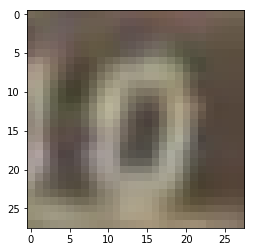

In [94]:
plt.imshow(testX[3])
print(classes2[3])

# Load modal and output prediction

In [161]:
date = '20170420_0745'
modelName = 'CNN_v4_v4_crop_batch500_epoch4'
model = load_model('../submission/'+date+"_"+modelName+'.h5')

In [69]:
fout = open('../submission/'+date+"_"+modelName+'.csv','w')
fout.write('ImageId,label\n')
for i,x in enumerate(classes2):
    fout.write("{},{}\n".format(i,x))
fout.close()

IOError: Unable to open file (Unable to open file: name = '20170406_0002_cnn_v1.h5', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)